In [1]:
import torch
from norse.torch.functional.tsodyks_makram import stp_step, TsodyksMakramState, TsodyksMakramParameters

In [2]:
def example(p):
    dt = 0.001
    z = torch.zeros(1000)
    z[::100] = 1.0
    z[0:10] = 0.0
 
    s = TsodyksMakramState(x=1.0, u=0.0)
    i = 0.0
    xs = []
    us = []
    current = []

    for ts in range(1000):
        x, s = stp_step(z[ts], s, p)
        di = -p.tau_s_inv * i
        i  = i + dt * di + x
        xs += [s.x]
        us += [s.u]
        current += [i]

    xs = torch.stack(xs)
    us = torch.stack(us)
    current = torch.stack(current)
    
    return xs, us, current


xs, us, current = example(TsodyksMakramParameters(
        tau_f_inv = 1 / (50.0e-3),
        tau_s_inv = 1 / (20.0e-3),
        tau_d_inv = 1 / (750.0e-3),
        U = 0.45
))

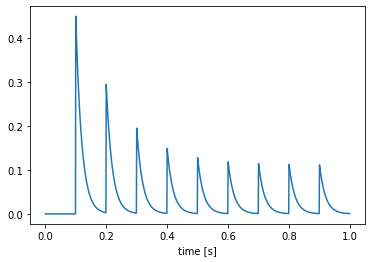

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.xlabel('time [s]')
plt.plot(np.arange(0,1.0,0.001), current)

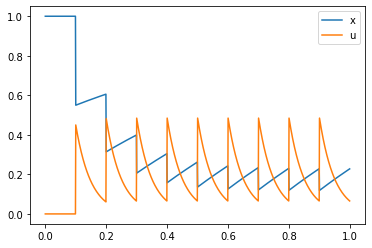

In [4]:
plt.plot(np.arange(0,1.0,0.001), xs, label='x')
plt.plot(np.arange(0,1.0,0.001), us, label='u')
plt.legend()

In [5]:
xs, us, current = example(TsodyksMakramParameters(
    tau_f_inv = 1 / (750.0e-3),
    tau_s_inv = 1 / (20.0e-3),
    tau_d_inv = 1 / (50.0e-3),
    U = 0.15
))

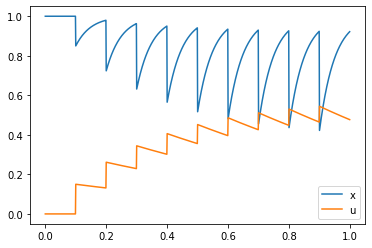

In [6]:
plt.plot(np.arange(0,1.0,0.001), xs, label='x')
plt.plot(np.arange(0,1.0,0.001), us, label='u')
plt.legend()

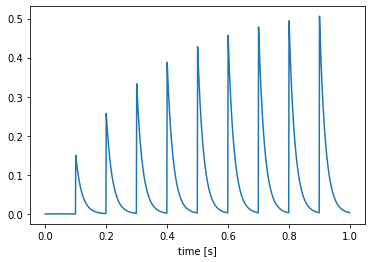

In [7]:
plt.xlabel('time [s]')
plt.plot(np.arange(0,1.0,0.001), current)